# Lecture 1: Getting started with python and audio

This window is a Jupyter notebook.  The code is python.  To create signals, I'm using numpy: https://numpy.org.  To use audio, I'm following the directions on https://musicinformationretrieval.com/ipython_audio.html.  

## 1. Tone

First, let's create a pure tone, at the frequency of middle C on the piano.

In [1]:
import numpy as np
sr = 8000 # sampling rate, [samples/second]
t = np.arange(sr)/sr # labels for the time axis
middle_C = 255 # middle C on the piano is about 255 Hz
tone = np.sin(2*np.pi*middle_C*t)  # a tone at middle C


Let's view the waveform.

Text(0.5, 1.0, '255Hz Pure Tone')

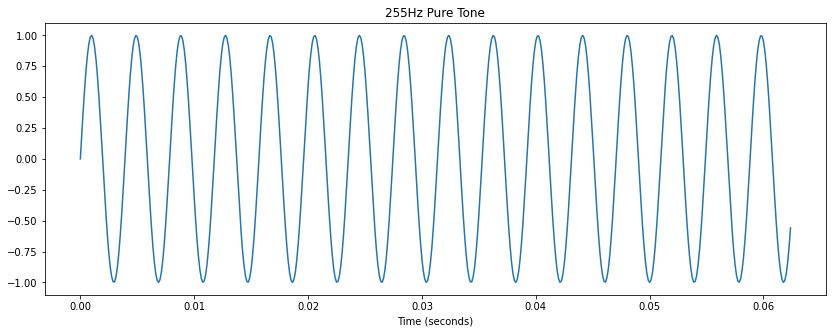

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(t[:500],tone[:500])
plt.xlabel('Time (seconds)')
plt.title('255Hz Pure Tone')

Let's view the spectrogram, using librosa.


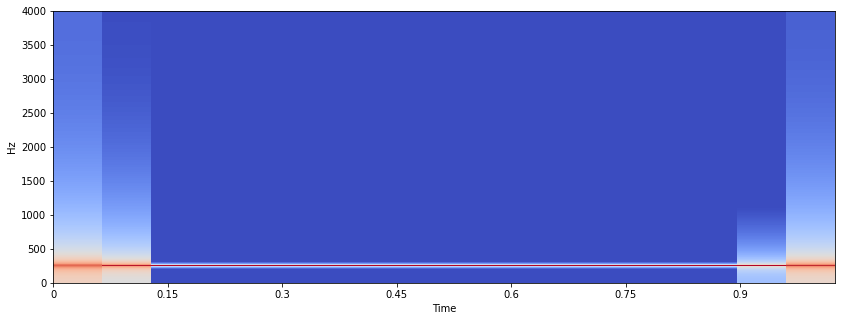

In [4]:
import librosa, librosa.display
TONE = librosa.stft(tone)
TONEdb = librosa.amplitude_to_db(abs(TONE))
plt.figure(figsize=(14, 5))
librosa.display.specshow(TONEdb, sr=sr, x_axis='time', y_axis='hz')

Now let's play the tone, using Ipython.display.audio.

In [6]:
import IPython.display as ipd
ipd.Audio(tone, rate=sr)

Now I want to write the waveform to a file, so I can open it using Praat or any other interface.  For this I use soundfile: https://pysoundfile.readthedocs.io/en/latest/

In [9]:
import soundfile as sf
sf.write('tone_255.wav', tone, sr)

-------------------------------
## 2. Click
-------------------------------
Next, let me create a click.   A click is mostly zeros, with just one high-amplitude sample in the middle.

Text(0.5, 1.0, 'Click at 0.5 seconds, with amplitude of 1000')

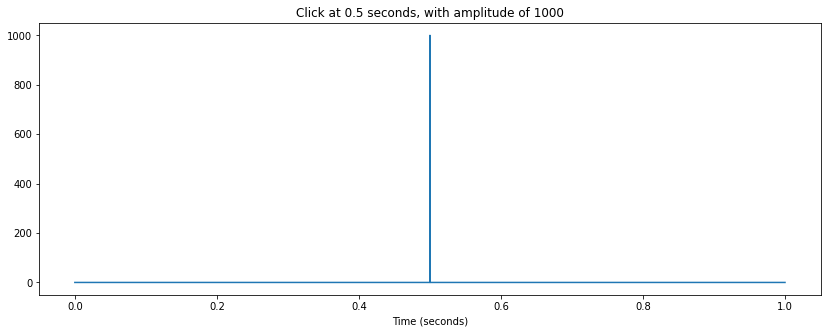

In [28]:
click = np.zeros(8000)
click[4000] = 1000 # arbitrary high-amplitude sample
plt.figure(figsize=(14, 5))
plt.plot(t,click)
plt.xlabel('Time (seconds)')
plt.title('Click at 0.5 seconds, with amplitude of 1000')

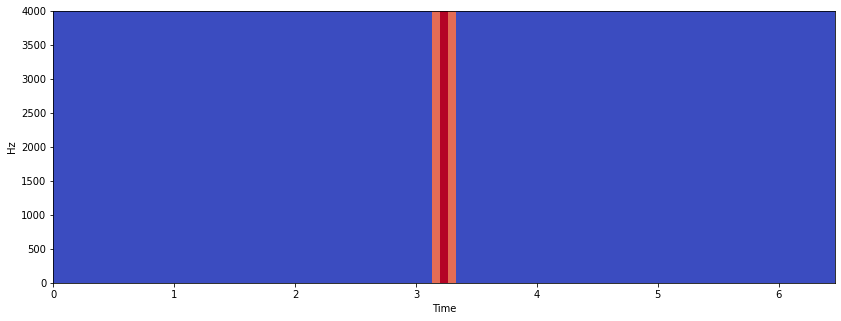

In [22]:
CLICK = librosa.stft(click, hop_length=80, win_length=240)  # 30ms window length, with a 10ms hop between windows
CLICKdb = librosa.amplitude_to_db(abs(CLICK))
plt.figure(figsize=(14, 5))
librosa.display.specshow(CLICKdb, sr=sr, x_axis='time', y_axis='hz')

In [15]:
ipd.Audio(click, rate=sr)

In [17]:
sf.write('click.wav', click, sr)

-------------------------------
## 3. Noise
-------------------------------
Finally, the third main type of signal: noise.  We'll use the function np.random.randn, which generates 8000 independent samples of a zero-mean, unit-variance Gaussian random variable.

Text(0.5, 1.0, 'Gaussian Noise, Mean=0.0, Variance=1.0')

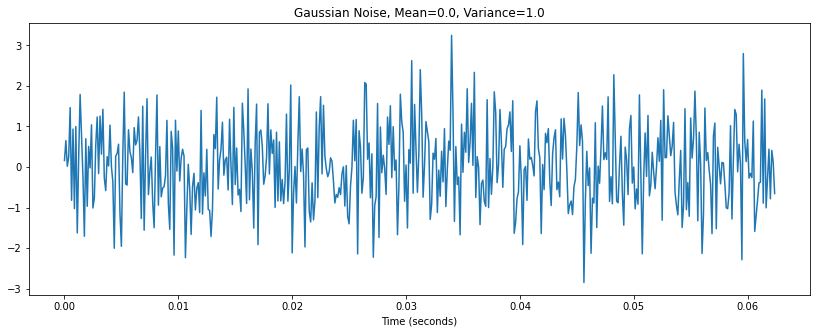

In [26]:
noise = np.random.randn(8000)
plt.figure(figsize=(14, 5))
plt.plot(t[:500],noise[:500])
plt.xlabel('Time (seconds)')
plt.title('Gaussian Noise, Mean=0.0, Variance=1.0')

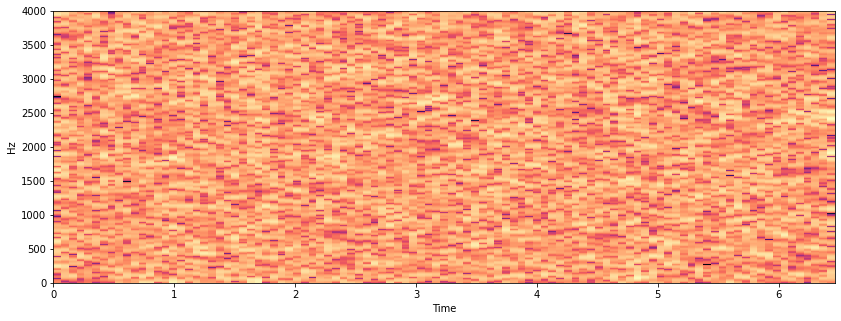

In [25]:
plt.figure(figsize=(14, 5))
NOISE = librosa.stft(noise, hop_length=80, win_length=240)
librosa.display.specshow(librosa.amplitude_to_db(abs(NOISE)), sr=sr, x_axis='time', y_axis='hz')

In [30]:
ipd.Audio(noise, rate=sr)

In [32]:
sf.write('noise.wav', noise, sr)

## 4. Next

Now go look at the same signals using Praat: https://uvafon.hum.uva.nl/praat/